# Movie Recommendation System

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Data set loading

In [2]:
df = pd.read_csv("src/movies.csv")

### Understanding the data

In [3]:
df.shape

(4803, 24)

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

### Update the df for filtering

In [6]:
required_columns = ["genres", "keywords", "overview", "title"]
df = df[required_columns]

Understanding new df


In [7]:
df.shape

(4803, 4)

In [8]:
df.head()

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


 We can see the missing values. With dropna() remove the rows that contains NULL values and with reset_index() we will resets the index of the df

In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4387 non-null   object
 1   keywords  4387 non-null   object
 2   overview  4387 non-null   object
 3   title     4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


We will combine the columns genres, keywords and overview. Later we can process this combined text together and used for recommendation.

In [12]:
df['combined'] = df['genres'] + '' + df['keywords'] + '' + df['overview']

In [13]:
df.head()

,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fictioncultur...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crimespy based on novel secre...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Action Adventure Science Fictionbased on novel...


In [14]:
df.tail()

,genres,keywords,overview,title,combined
4382,Drama,gang audition police fake homeless actress,A young woman in L.A. is having a bad day: she...,Bang,Dramagang audition police fake homeless actres...
4383,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,Friends/fledgling entrepreneurs invent a devic...,Primer,Science Fiction Drama Thrillerdistrust garage ...
4384,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,El Mariachi just wants to play his guitar and ...,El Mariachi,Action Crime Thrillerunited states\u2013mexico...
4385,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered",Comedy Drama Romance TV Moviedate love at firs...
4386,Documentary,obsession camcorder crush dream girl,Ever since the second grade when he first saw ...,My Date with Drew,Documentaryobsession camcorder crush dream gir...


From now on we will work on title and combined so lets make new df for them.

In [15]:
data = df[['title', 'combined']]

In [16]:
data.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fictioncultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...
2,Spectre,Action Adventure Crimespy based on novel secre...
3,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...
4,John Carter,Action Adventure Science Fictionbased on novel...


In [17]:
data.shape

(4387, 2)

The word cloud is a visual tool for displaying the most frequently used words in a text or set of texts. So we will apply it for movie content

In [18]:
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400).generate(combined_text)

Let's visualize it

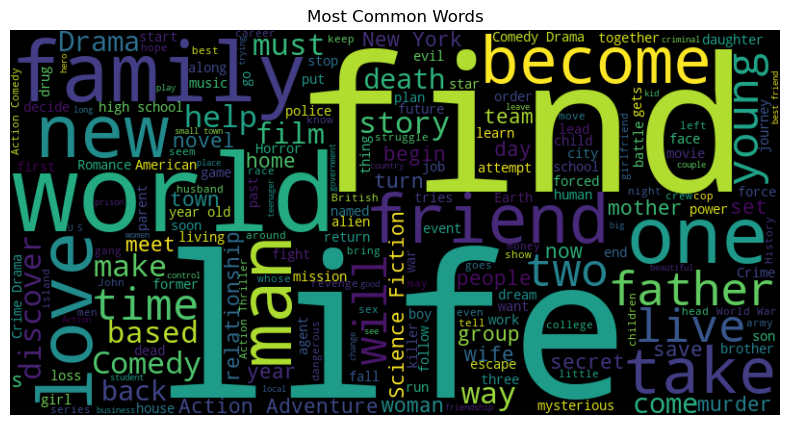

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words")
plt.show()

Now we will install NLTK Data, <br>
NLTK PUNKT is an unsupervised trainable tokenizer that splits text into sentences. <br>
punkt_tab is part of the punkt tokenizer package — it's an internal table that contains preprocessed information (like abbreviation handling, etc.) for better tokenization accuracy. <br>
Nltk stop words are widely used words (such as “the,” “a,” “an,” or “in”) that a search engine has been configured to disregard while indexing and retrieving entries

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Casper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Casper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Casper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words= set(stopwords.words('english'))

We will write a function named preprocess_text, this function cleans text by:
- Removing numbers and symbols,
- Lowercasing everything,
- Removing stopwords,
- Giving you a clean, simple string ready for Machine Learning or NLP tasks.

In [22]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

Now we can apply our function to our data

In [23]:
data['cleaned_text'] = df['combined'].apply(preprocess_text)

C:\Users\Casper\AppData\Local\Temp\ipykernel_8168\3547093490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [24]:
data.head()

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fictioncultur...,action adventure fantasy science fictioncultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...,adventure fantasy actionocean drug abuse exoti...
2,Spectre,Action Adventure Crimespy based on novel secre...,action adventure crimespy based novel secret a...
3,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...,action crime drama thrillerdc comics crime fig...
4,John Carter,Action Adventure Science Fictionbased on novel...,action adventure science fictionbased novel ma...


Term Frequency - Inverse Document Frequency (TF-IDF) measures how important a term is within a document relative to a collection of documents.
Computers, systems and algorithms doesn't understand words. It only understands numbers. So we are going to convert each rows into vectors ( feature vectors) so taht you can find the distance between two vectors.

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

cosine_similarty calculates the cosine similarity between each pair of texts in the tfidf_matrix. <br>
Square matrix (a table) occurs, each value in the matrix shows how similar one document is to another. from 0 = not similar at all to 1 = exactly the same

In [26]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):

    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    movie_indices = [i[0] for i in sim_scores]

    return df[['title']].iloc[movie_indices]

This recommendation function takes a movie name, finds it, calculates the most similar movies based on text similarity (cosine similarity), and returns the top 5 (or top_n) recommended movies.

In [28]:
data['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4382                                        Bang
4383                                      Primer
4384                                 El Mariachi
4385                   Signed, Sealed, Delivered
4386                           My Date with Drew
Name: title, Length: 4387, dtype: object

Now we try it

In [29]:
movie_name = data['title'][9]
print("Movie name: " + movie_name)
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Movie name: Batman v Superman: Dawn of Justice
Recommendations for the Movie Batman v Superman: Dawn of Justice
                title
14       Man of Steel
1401  Superhero Movie
861       Superman II
424    Batman Returns
3590         Defendor
